In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
beta_results = {'Dueling DQN-PER': {'beta': [1, 3, 5, 7, 9],
                                    'Accuracy': [93.120, 97.147, 98.200, 98.676, 99.007],
                                    'Episode length': [9.214, 17.761, 20.151, 21.047, 21.444],
                                    'wPAHM score': [88.887, 76.211, 65.486, 63.610, 56.873],
                                    'Average pathway score': [63.270, 27.181, 17.676, 15.300, 12.255]
                                   },
                'Dueling DDQN-PER': {'beta': [1, 3, 5, 7, 9],
                                     'Accuracy': [88.251, 95.944, 96.947, 97.820, 98.479],
                                     'Episode length': [7.466, 12.392, 14.818, 13.972, 15.687],
                                     'wPAHM score': [84.888, 88.512, 85.026, 87.193, 83.451],
                                     'Average pathway score': [71.917, 50.615, 40.966, 45.280, 36.941]
                                    }
               }

#### Accuracy vs beta

In [44]:
def make_plot_plotly(x, ys_list, metric):
    data = []
    for y in ys_list:
        trace = go.Scatter(x=x, y=beta_results[y][metric], mode='lines', name=y)
        data.append(trace)
        
    layout = go.Layout(
    title = f'{metric} vs beta',
    xaxis=dict(title = '$\\beta$', showgrid = False),
    yaxis=dict(title = metric, showgrid=False),
    legend=dict(x=0, y=1, traceorder='normal'),
    width=800,
    height=600,
#     plot_bgcolor='white',
    )
        
    fig = go.Figure(data=data, layout=layout)
    fig.show()    

In [45]:
def make_plot_sns(x, ys_list, metric, save=False):
    data = pd.DataFrame()
    data['x'] = x
    for y in ys_list:
        data[y] = beta_results[y][metric]
        
    sns.set(style="white", rc={"axes.grid": False})

    plt.figure(figsize=(8, 6))
    for y in ys_list:
        sns.lineplot(x='x', y=y, data=data, label=y)

    plt.xlabel('β (Beta)', fontsize=16)
    plt.ylabel(metric, fontsize=16)
#     plt.ylim([0, 25])
    plt.title(f'{metric} vs Beta', fontsize=20)
#     plt.legend(loc='lower right')

    
    if save:
        plt.savefig(f'../plots/dueling_dqn_per_{"_".join(metric.split())}_vs_beta.png')
    
    plt.show()


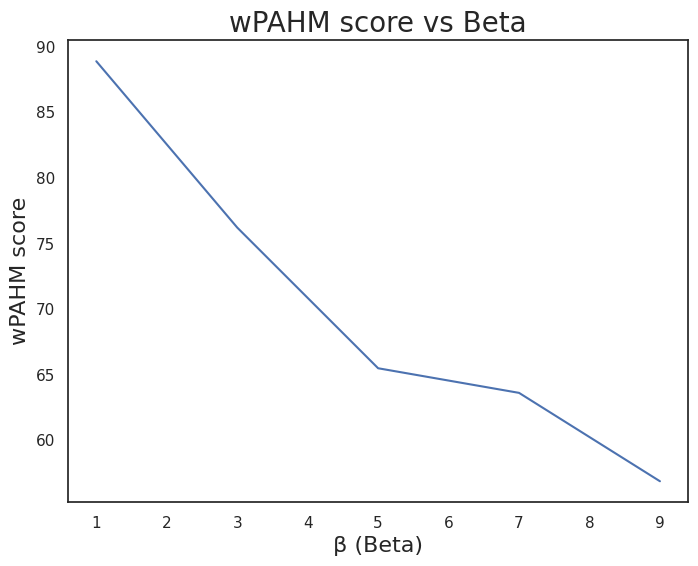

In [46]:
make_plot_sns(beta_results['Dueling DQN-PER']['beta'], ['Dueling DQN-PER'], 'wPAHM score', True)

#### Accuracy - Pathway score trade-off plots

In [91]:
def plot_acc_path_tradeoff(model_name, save=False):
    data = pd.DataFrame()
    data['beta'] = beta_results[model_name]['beta']
    data['Accuracy'] = beta_results[model_name]['Accuracy']
    data['Average pathway score'] = beta_results[model_name]['Average pathway score']
        
    sns.set(style='white', rc={'axes.grid': False})

    plt.figure(figsize=(10, 6))
    
    sns.lineplot(x='Average pathway score', y='Accuracy', data=data, marker='o')

    plt.xlabel('Pathway score', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
#     plt.ylim([0, 25])
    plt.title('Accuracy - Average Pathway Score Trade-off', fontsize=20)
    for line in range(0, len(data)):
        
        plt.text(data['Average pathway score'][line], data['Accuracy'][line], f'$\\beta$={data["beta"][line]}', 
                 horizontalalignment='left')
#     for i, txt in enumerate(beta_results[model_name]['beta']):
#         plt.annotate(txt, (beta_results[model_name]['Accuracy'][i], beta_results[model_name]['Pathway score'][i]))

    
    if save:
        plt.savefig('../plots/dueling_dqn_per_acc_path_tradeoff.png')
    
    plt.show()

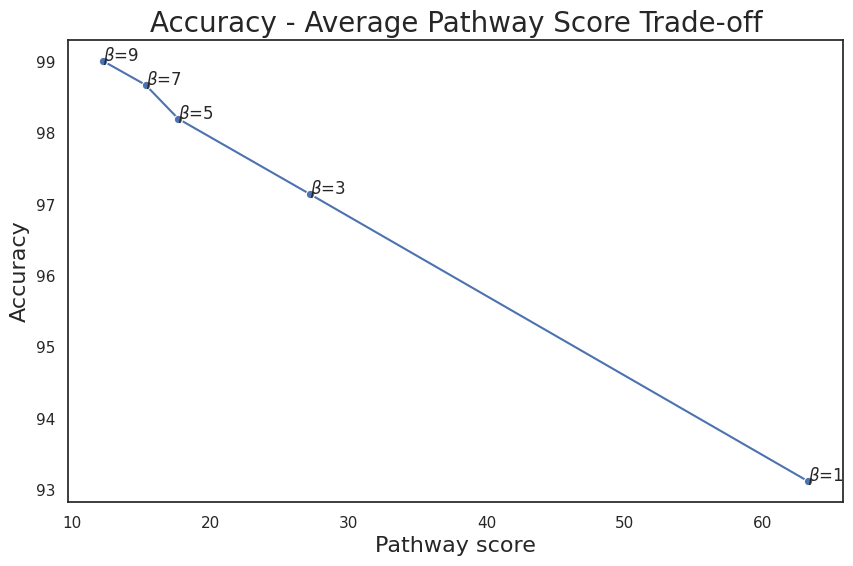

In [92]:
plot_acc_path_tradeoff('Dueling DQN-PER', save=True)

In [47]:
# make_plot_sns(beta_results['Dueling DQN-PER']['beta'], ['Dueling DQN-PER', 'Dueling DDQN-PER'], 'Pathway score', 
#               True)

In [ ]:
####